In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed
    # you can uncomment the following lines to install it automatically
    #import subprocess ; subprocess.check_call([sys.executable, "-m", "pip", "install", "pyqula"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'

# parallelization
# from pyqula import parallel ; parallel.set_cores("max") # uncomment to use all the cores

import numpy as np

# Magnetism in 2D materials
In this session we will address several examples about magnetism in 2D materials

### Contents
- Symmetry breaking by magnetic interactions
- The strong coupling limit of a magnetic system
- Intermediate coupling regime and Stoner instability
- Non-collinear magnetism from competing interactions
- Non-collinear magnetism from spin-orbit coupling
- Non-collinear magnetism from magnetic frustration
- Charge-magnetic coupling

### Learning outcomes
- Understand the impact of electronic repulsion in an electronic structure
- Rationalize the intermediate and strong coupling regimes of an interacting magnetic system
- Understand mechanism leading to non-collinear magnetism
- Rationalize the interplay between charge and magnetic order

## Magnetic order driven by interactions
We will start showing the magnetic instabilities of a 1D chain at half filling, with two sites per unit cell

([], [])

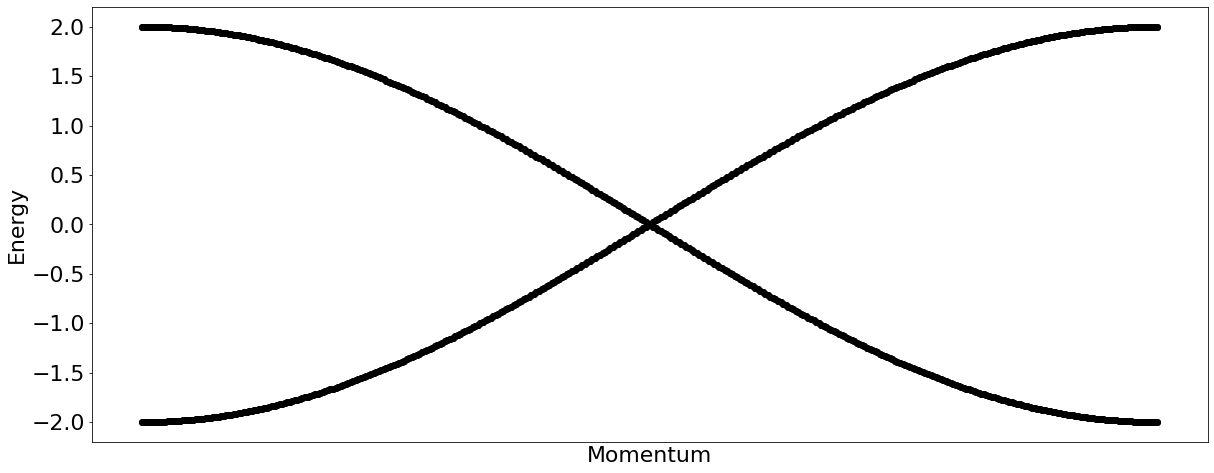

In [2]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Discuss why there are two bands

(-3.85, 3.85, -0.05500000000000001, 0.05500000000000001)

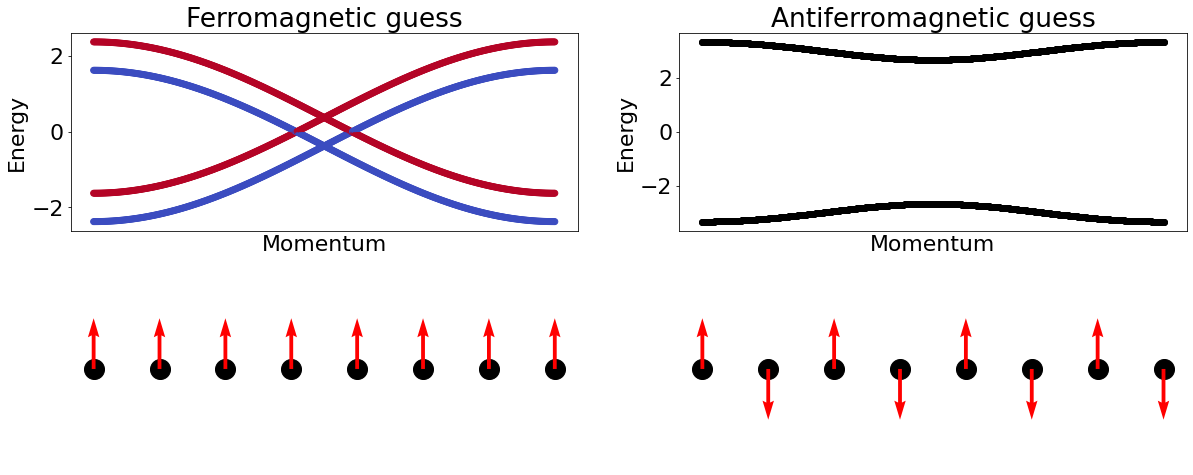

In [3]:
# let us now add interactions, and compute the electronic structure
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

U = 6.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")
hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro") # solve the interacting problem with a mean-field guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = hfe.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro") # solve the interacting problem with a mean-field guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = haf.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

### Exercise
- Discuss which solution you think it has the lowest energy, and why
- Compute the selfconsistent solution for stronger values of the interaction. Which change do you observe?

## The strong coupling limit
Let us now compare the energies of a ferromagnetic and antiferromagnetic state in the strong coupling limit

Text(0, 0.5, 'Energy FE - AF')

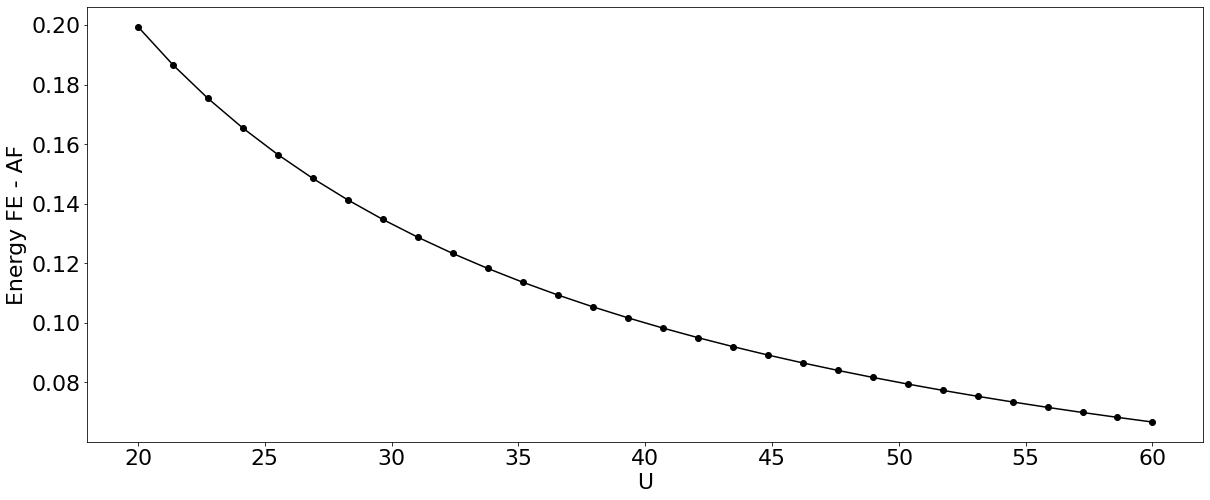

In [4]:
# let us now compute the energy difference as a function of U
from pyqula import geometry
def get_energy_difference(U):
    g = geometry.bichain() # generate a chain with two sites per unit cell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (hfe,efe) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="ferro",mix=0.9) # FE
    (haf,eaf) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="antiferro",mix=0.9) # AF
    return efe - eaf

Us = np.linspace(20.,60,30) # values of U considered

Et = [get_energy_difference(U) for U in Us] # energy differences

plt.plot(Us,Et,c="black",marker="o") # plot total energy VS value of U
plt.xlabel("U") ; plt.ylabel("Energy FE - AF")

### Exercise
- Which state has the lowest energy?
- Discuss why the dependence of 1/U is observed in the energy differences between FE and AF configurations
- Compute this very same curve but going to lower values of U. Why does the 1/U behavior break down?

## Intermediate coupling regime and Stoner instability
Let us now show how there is a critical value of the electronic interaction to develop time-reversal symmetry breaking

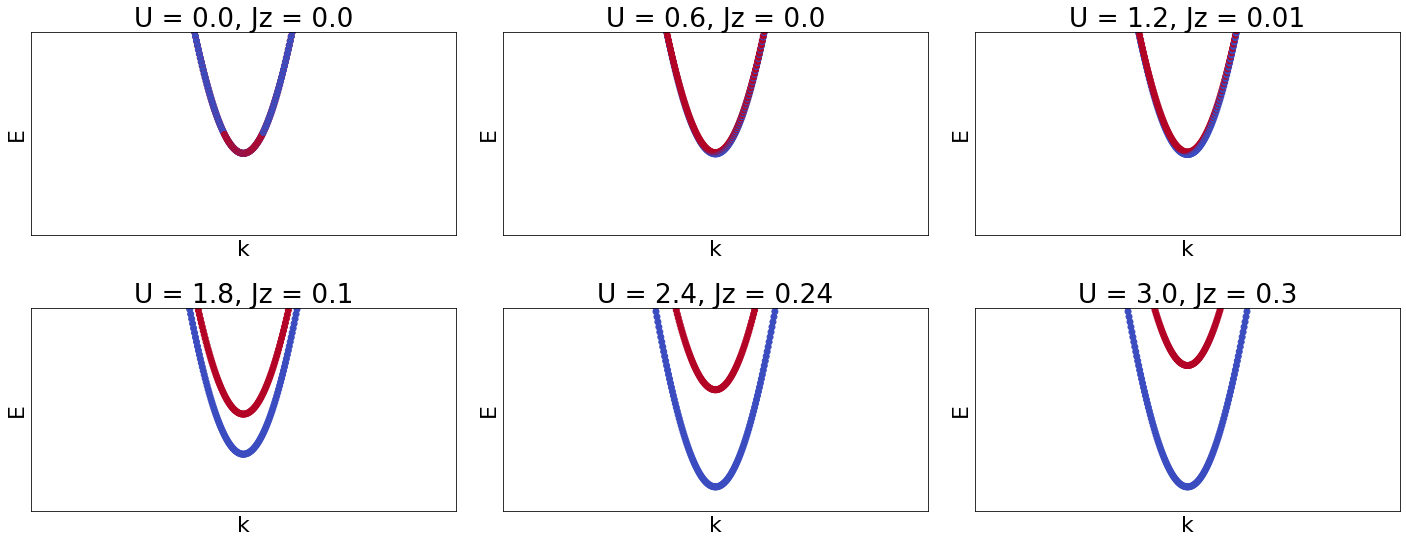

In [5]:
from pyqula import geometry
N = 6 # number of plots
Us = np.linspace(0.,3.0,N) # strengths of electronic interaction

ii = 1 # counter for the subplots
for U in Us:
    g = geometry.chain() # generate a chain
    h = g.get_hamiltonian() # generate the Hamiltonian
    h = h.get_mean_field_hamiltonian(U=U,filling=0.1,mf="ferro",mix=0.9,nk=200) # perform SCF
    plt.subplot(N//3,3,ii); ii += 1 
    (k,e,c) = h.get_bands(operator="sz") # compute band structure
    jz = np.mean(np.abs(h.extract("mz"))) # magnetization
    plt.title("U = "+str(np.round(U,2))+", Jz = "+str(np.round(jz,2))) # set the title
    plt.scatter(k,e,c=c) ; plt.yticks([]) ; plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.xlabel("k") ; plt.ylabel("E")
plt.tight_layout() # adjust the subplots

### Exercise
- Perform the calculation at a smaller filling (0.05 for example). Does the critical value increase or decrease?
- Perform the calculation at a bigger filling (0.2 for example). Does the critical value increase or decrease?
- Discuss why the critical value leading to magnetism changes

## Magnetism in flat bands
Let us now show the emergence of magnetic instabilities in a flat band system. For that, we will put a vacancy in a honeycomb lattice, which gives rise to a flat zero mode

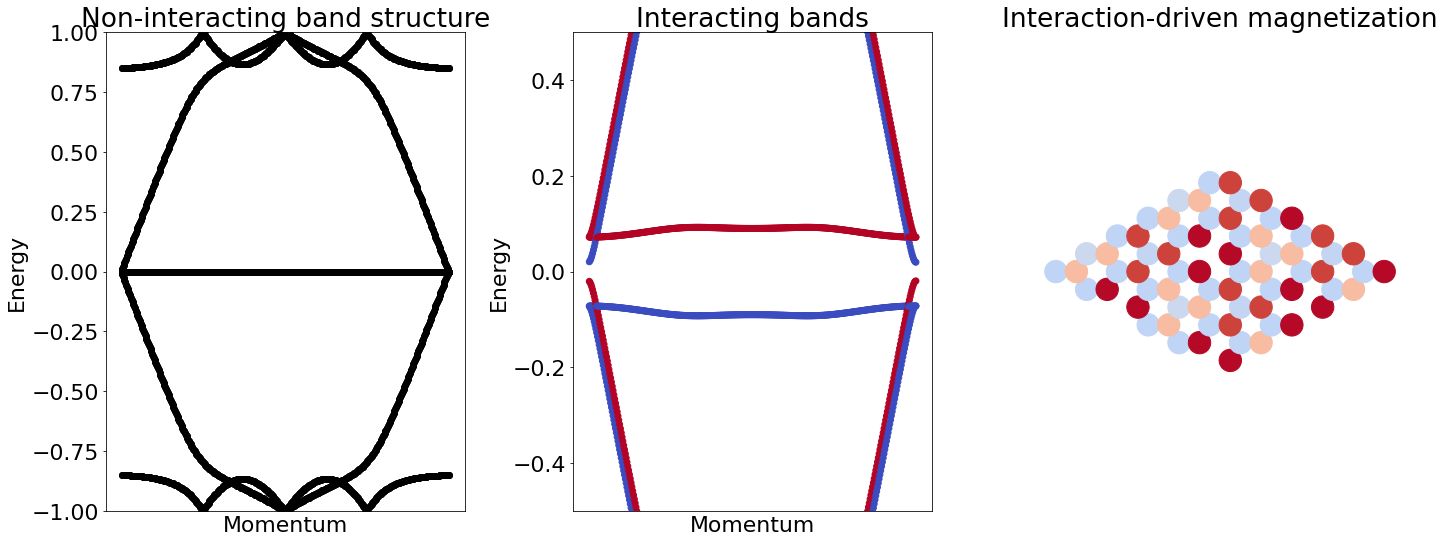

In [6]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
N=3 ; g = g.get_supercell((N,N)) ; g = g.remove(0) # make a supercell and remove a site

# first plot the non-interacting bands
plt.subplot(1,3,1) ; plt.title("Non-interacting band structure")
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])# plot

# compute the mean-field Hamiltonian
U = 1.0 # value of the interaction
hscf = h.get_mean_field_hamiltonian(U=U,mix=0.9,mf="ferro") # perform mean-field

# plot the interacting bands
plt.subplot(1,3,2) ; plt.title("Interacting bands")
(k,e,c) = hscf.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,.5])# plot

# plot the selfconsistent magnetization
plt.subplot(1,3,3) ; plt.title("Interaction-driven magnetization")
hs = hscf.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.1,vmax=.1,s=500) ; plt.axis("off") ; plt.axis("equal")

plt.tight_layout() # adjust subplots

### Exercise
- Change the value of the interaction U. Do you have an instability also for smaller U?
- Discuss how this can be understood in terms of the Stoner instability
- Take a different supercell N, and discuss if you observe flat bands and interaction-induced magnetization
- Replace the honeycomb lattice by a square lattice with even N. Show that flat bands and a magnetization appears in the unit cell

## Non-collinear magnetism from competing interactions
Let us now include further neighbor hoppings, which promotes competing magnetic interactions

(-10.45, 10.45, -0.05500000000000001, 0.05500000000000001)

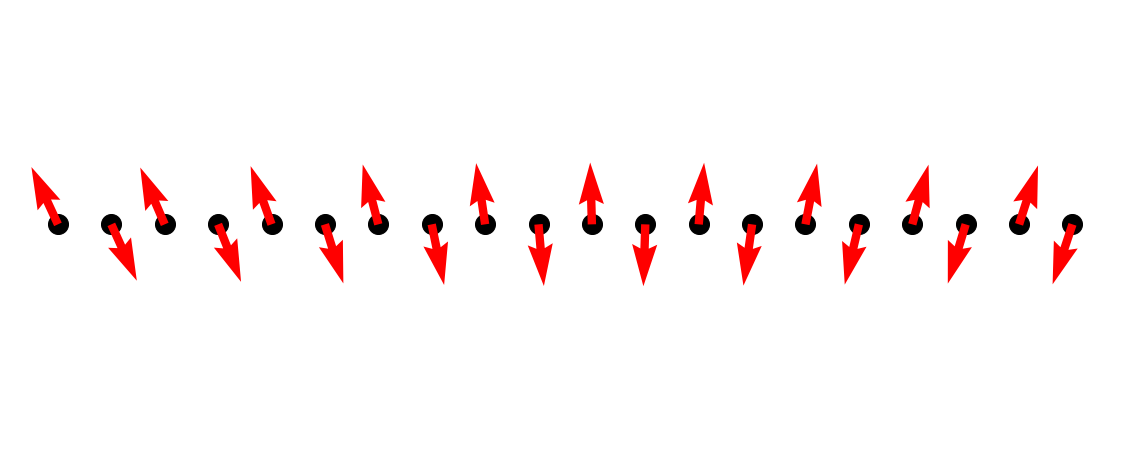

In [7]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(20) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian(tij=[1.,.3]) # generate the Hamiltonian

# generate the selfconsistent (SCF) Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Exercise
- Discuss why including second neighbor hopping gives rise to a non-collinear magnetic state
- Is there a long neighbor hopping that can be included that does not lead to non-collinearity? Include it and show that you recover the antiferromagnetic state

#### In the lab
- Non-collinear magnetism coming from copeting interactions is observed in 2D materials, and in particular in the multiferroic monolayer NiI2
https://www.nature.com/articles/s41586-021-04337-x

## Non-collinear magnetism from spin-orbit coupling
We will now see that spin-orbit coupling is also able to generate a non-collinear magnetic texture

(-4.95, 4.95, -0.05500000000000001, 0.05500000000000001)

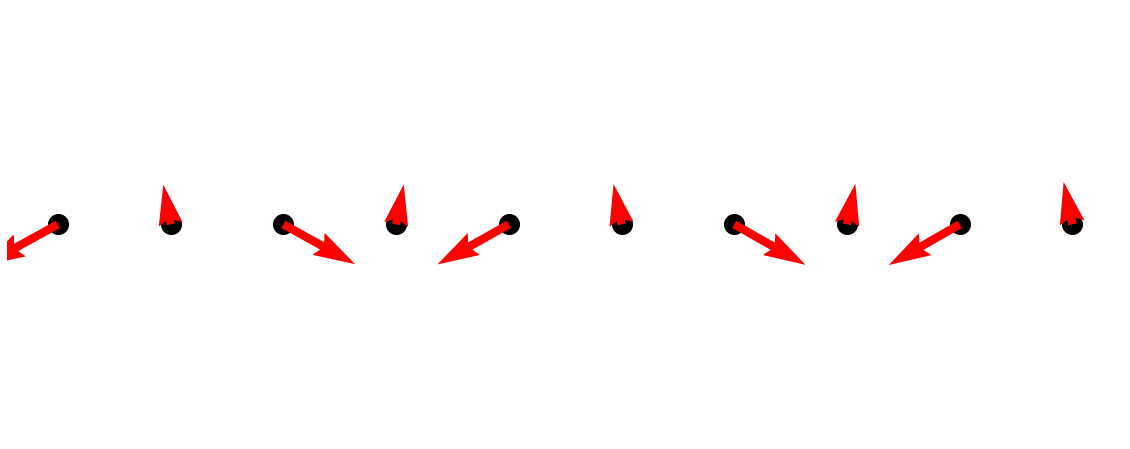

In [8]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(10) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_rashba(1.) # add Rashba spin-orbit coupling

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="random",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Exercise
- Discuss why spin-orbit coupling gives rise to non-collinear magnetism
- What is the term in the spin Hamiltonian that Rashba SOC generates?
- What happens to the spin texture if the sign of the Rashba term is reversed? (Physically, it means flipping the sample upside down)

## Magnetic instabilities of the square lattice
Let us now address the magnetic instabilities of the square lattice

(-1.65, 1.65, -1.65, 1.65)

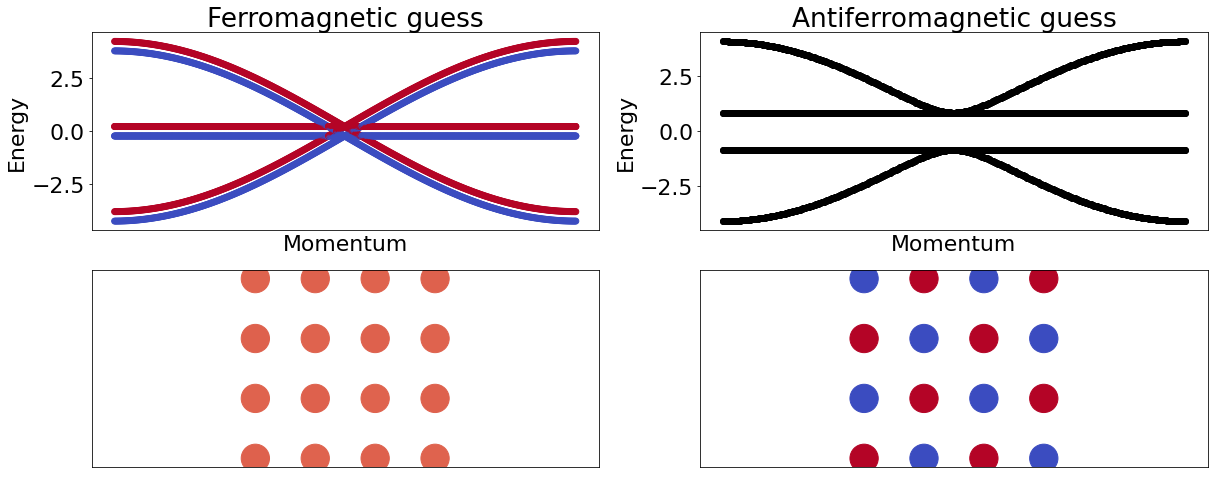

In [9]:
from pyqula import geometry
g = geometry.square_lattice_bipartite() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 3.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")

hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro",mix=0.9) # FE guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot z-component of the magnetization
hs = hfe.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # AF guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot z-component of the magnetization
hs = haf.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([]) ; plt.axis("equal")

## Non-collinear magnetic order from geometric frustration
We will now address 2D models that show non-collinear magnetism due to the geometric frustration of the lattice.

(-4.124999999999999, 4.124999999999999, -2.3815698604072066, 2.381569860407206)

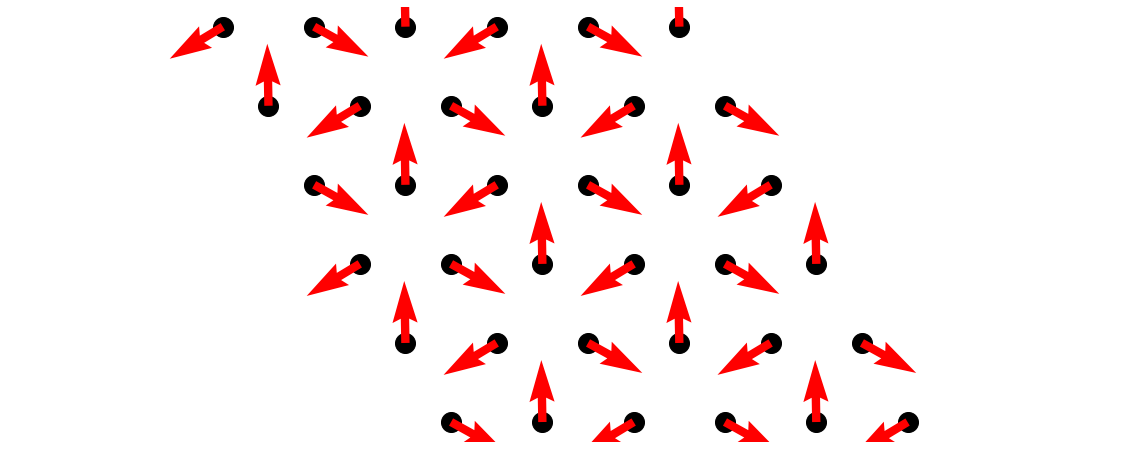

In [10]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a chain 
g = g.get_supercell((3,3)) # make a supercell
h = g.get_hamiltonian() # generate the Hamiltonian

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
hs = h.get_supercell(2) # generate a supercell
mx = hs.extract("mx") ; my = hs.extract("my") ; x = hs.geometry.r[:,0] ; y = hs.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red")  # plot magnetization
plt.axis("equal") ; plt.axis("off")

### Exercise
- Plot the band structure for the SCF solution for the 3x3 supercell, and estimate its gap
- Plot the band structure for the SCF solution for the 1x1 supercell, and estimate its gap
- Can you infer which one is the lowest energy solution, and why?

## Competition between interactions
Let us now address the magnetic instabilities of the honeycomb lattice, and see the interplay between charge and spin order

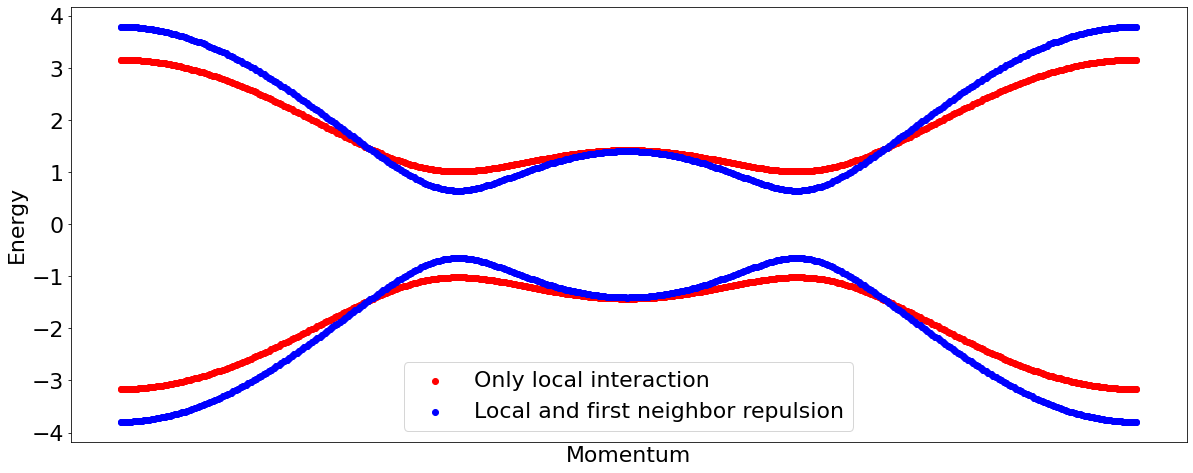

In [11]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 3.5 # value of the local interaction
V = 1 # value of the first neighbor interaction

# first with U
hU = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # only U
(k,e) = hU.get_bands() # compute band structure
plt.scatter(k,e,c="red",label="Only local interaction") ; plt.xlabel("Momentum") 
plt.ylabel("Energy") ; plt.xticks([]) # plot

# and with U and V
hUV = h.get_mean_field_hamiltonian(U=U,V1=V,mf="antiferro",mix=0.9) # U and V
(k,e) = hUV.get_bands() # compute band structure
plt.scatter(k,e,c="blue",label="Local and first neighbor repulsion") 
plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

plt.legend()

### Exercise
- Discuss what is the impact of first neighbor repulsion. Is it promoting or quenching magnetic order?
- Take a value of U slightly above the critical one (U=2.3), and add a small first neighbor repulsion. Do you observe magnetic order?

## Competition between charge and magnetic order in the honeycomb lattice
Let us now look in more detail at the interacting honeycomb lattice. In particular, we will see what is the interplay between U and V, showing that U promotes magnetic order and V promotes charge order

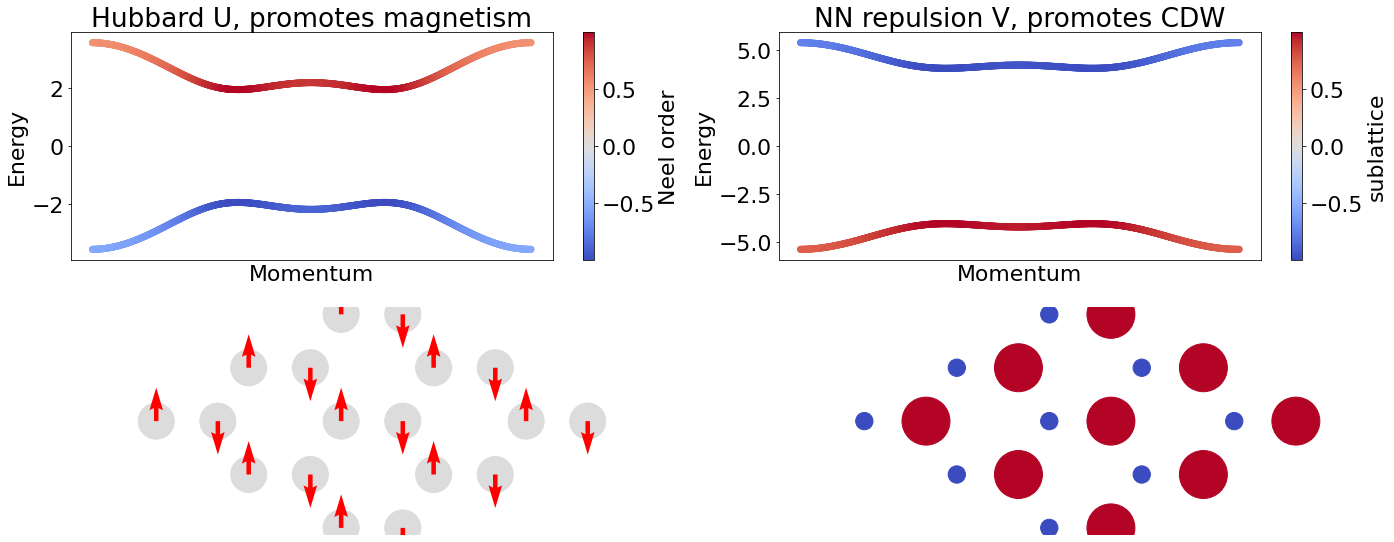

In [12]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 5.0 # value of the local interaction
V = 1.5 # value of the first neighbor interaction

def plot_MCDW(h): # given a Hamiltonian, plot magnetization and CDW
    hs = h.get_supercell(3) ; mz = hs.extract("mz") ; mx = hs.extract("mx") 
    x = hs.geometry.r[:,0] ; y = hs.geometry.r[:,1] ; ons = hs.extract("density") ; ons = np.tanh(ons) # saturate
    plt.scatter(x,y,c=ons,vmin=-1,vmax=1.,s=(1.3+ons)*1000) # plot CDW
    if np.max(mx**2+mz**2)>1e-3: plt.quiver(x,y,mx,mz,color="red")  # plot magnetization
    plt.axis("equal") ; plt.axis("off")

# first with U
plt.subplot(2,2,1)
plt.title("Hubbard U, promotes magnetism")
hU = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # only U
op = h.get_operator("sz")*h.get_operator("sublattice") # Sz times sublattice
(k,e,c) = hU.get_bands(operator=op) # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.colorbar(label="Neel order") # plot
plt.subplot(2,2,3) ; plot_MCDW(hU) # make the plot of magnetization and cdw


# and with V
plt.subplot(2,2,2)
plt.title("NN repulsion V, promotes CDW")
hV = h.get_mean_field_hamiltonian(V1=V,mf="random",mix=0.9) # U and V
(k,e,c) = hV.get_bands(operator="sublattice") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.colorbar(label="sublattice") # plot
plt.subplot(2,2,4) ; plot_MCDW(hV) # make the plot of magnetization and cdw

plt.tight_layout() # adjust plots

### Exercise
- Replace the sublattice*mz operator in Hubbard case, by the sublattice operator. What do you observe and why?
- Replace the sublattice operator in V-interaction case, by the sublattice*mz operator. What do you observe and why?


## Simultaneous charge and magnetic ordering in the honeycomb lattice
Let us now impose the existence of both charge order and magnetism in the honeycomb lattice

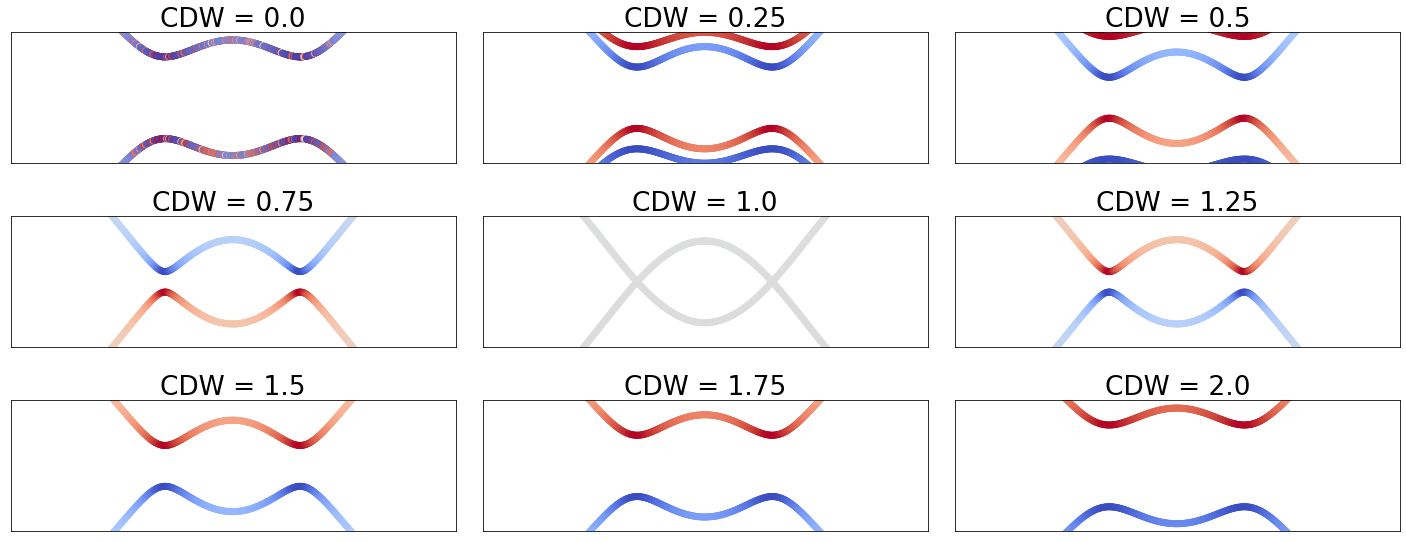

In [13]:
from pyqula import geometry
N = 9 # number of plots
cdws = np.linspace(0.,2.0,N) # strengths

ii = 1 # counter for the subplots
for cdw in cdws:
    g = geometry.honeycomb_lattice() # generate a chain
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.add_sublattice_imbalance(cdw) # Add a CDW order explicitly
    h.add_antiferromagnetism(1.0) # add antiferromagnetism explicitly
    plt.subplot(N//3,3,ii); ii += 1 
    (k,e,c) = h.get_bands(operator="sublattice") # compute band structure
    plt.title("CDW = "+str(np.round(cdw,2))) # set the title
    plt.scatter(k,e,c=c) ; plt.yticks([]) ; plt.xticks([]) ; plt.ylim([-1.6,1.6]) # plot
plt.tight_layout() # adjust the subplots

### Exercise
- Given a certain value of the AF order, what is the value of the CDW required to close the gap?
- Discuss why it is energetically unfavorable to have simultaneously antiferromagnetism and charge density wave order

## Electronic instabilities in graphene multilayers
Let us now address specific graphene multilayers, and show how magnetic instabilities can emerge due to their enhanced density of states

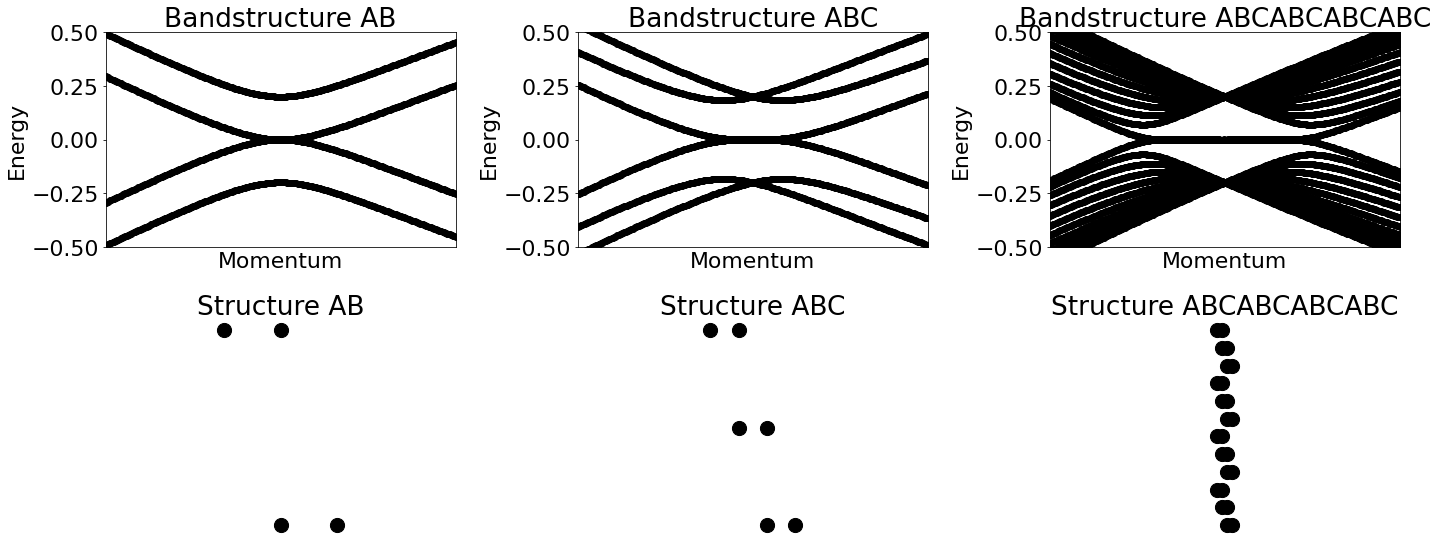

In [14]:
from pyqula import specialhamiltonian
mls = ["AB","ABC","ABCABCABCABC"] # graphene multilayers to consider
ii = 1 # counter
for m in mls: # loop over multilayers
    h = specialhamiltonian.multilayer_graphene(l=m,ti=0.2) # Hamiltonian of the graphene multilayer
    # make a small Kpath around the K point
    Kp = h.geometry.get_kpath(["K"])[0] ; kpath = [dk*Kp for dk in np.linspace(0.9,1.1,300)]
#    h = h.get_supercell(4) # make a supercell to see the bands easier
#    h.add_onsite(lambda r: r[2]*0.1/np.max(h.geometry.r[:,2])) # to add an electric field 
    (k,e) = h.get_bands(nk=300,kpath=kpath) # compute band structure
    plt.subplot(2,len(mls),ii) ; plt.title("Bandstructure "+m)
    plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
    plt.ylim([-.5,.5]) ; plt.xlim([min(k),max(k)])
    plt.subplot(2,len(mls),ii+len(mls)) ; plt.title("Structure "+m) ; gs = h.geometry
    plt.scatter(gs.r[:,0],gs.r[:,2],c="black",s=200) ; plt.axis("equal") ; plt.axis("off")
    ii += 1
    
plt.tight_layout() # tight layout

### Exercise
- Which of the three graphene multilayers above can have a stronger electronic instability? Discuss why
- Add an interlayer bias (as noted in the comment). WHat happens to the electronic structure?

## Magnetic symmetry breaking in graphene multilayers
We will now add interactions to a grpahene multilayer, and see that those interactions open up a gap

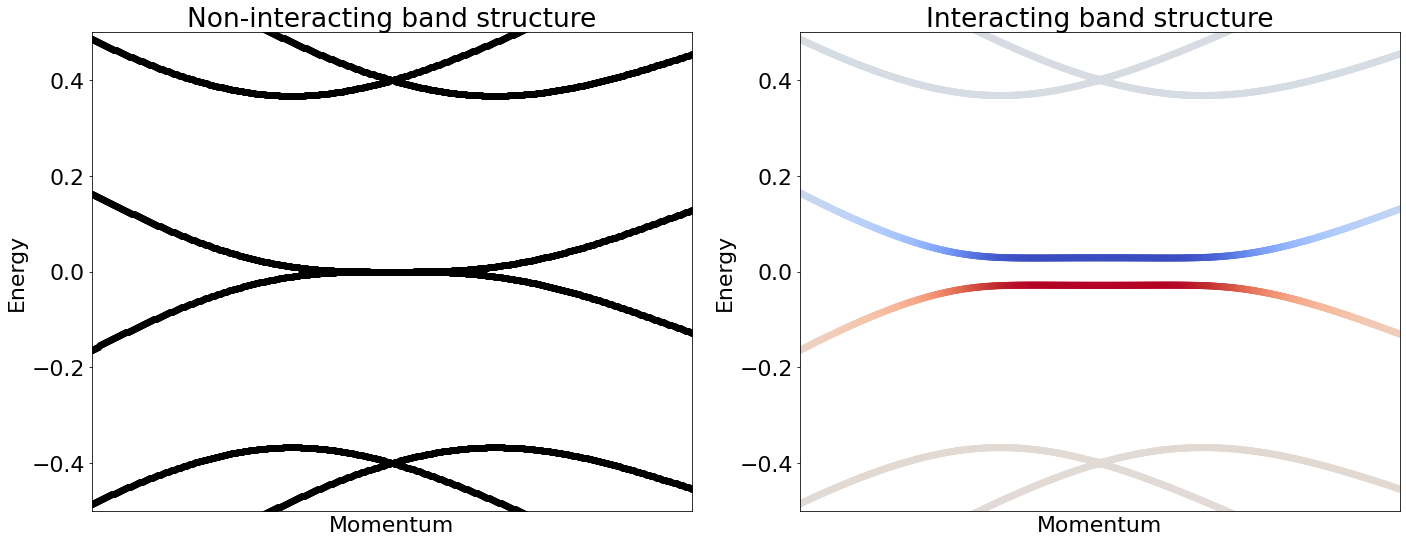

In [15]:
from pyqula import specialhamiltonian
h = specialhamiltonian.multilayer_graphene(l="ABC",ti=0.4) # Hamiltonian of the graphene multilayer
h.turn_spinful() 
# first plot the non-interacting bands
plt.subplot(1,2,1) ; plt.title("Non-interacting band structure")
# kpath around the K point
Kp = h.geometry.get_kpath(["K"])[0] ; kpath = [dk*Kp for dk in np.linspace(0.9,1.1,300)]
(k,e) = h.get_bands(nk=400,kpath=kpath) # compute band structure 
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.xlim([min(k),max(k)])

# compute the mean-field Hamiltonian
U = 2. # value of the interaction
hscf = h.get_mean_field_hamiltonian(U=U,filling=0.5,mix=0.9,mf="random",nk=30) # perform SCF

# plot the interacting bands
plt.subplot(1,2,2) ; plt.title("Interacting band structure")
op = hscf.get_operator("sz")*hscf.get_operator("sublattice")
(k,e,c) = hscf.get_bands(operator=op,nk=400,kpath=kpath) # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.xlim([min(k),max(k)])

plt.tight_layout() # adjust subplots

### Exercise
- Replace the multilayer by a single graphene monolayer. Do you still observe the electronic instability? Discuss why
- Add an out of plane electric field in the sample (add_onsite). What happens to the electronic instability?
- Change the doping of the system, how does the electronic instability change?

#### In the lab
- Symmetry breaking in aligned multilayers has been observed experimentally for a variety of different thicknesses
https://www.science.org/doi/10.1126/science.aar6855

## Spinon Fermi surface in gapless quantum spin liquids
In the description of quantum spin liquids, effective single particle excitations known as spinons arise, that can be effectively described with a tight binding Hamiltonian. Here we will see how the Fermi surface of a gapless quantum spin liquid in the triangular lattice can evolve as a function of the couplings

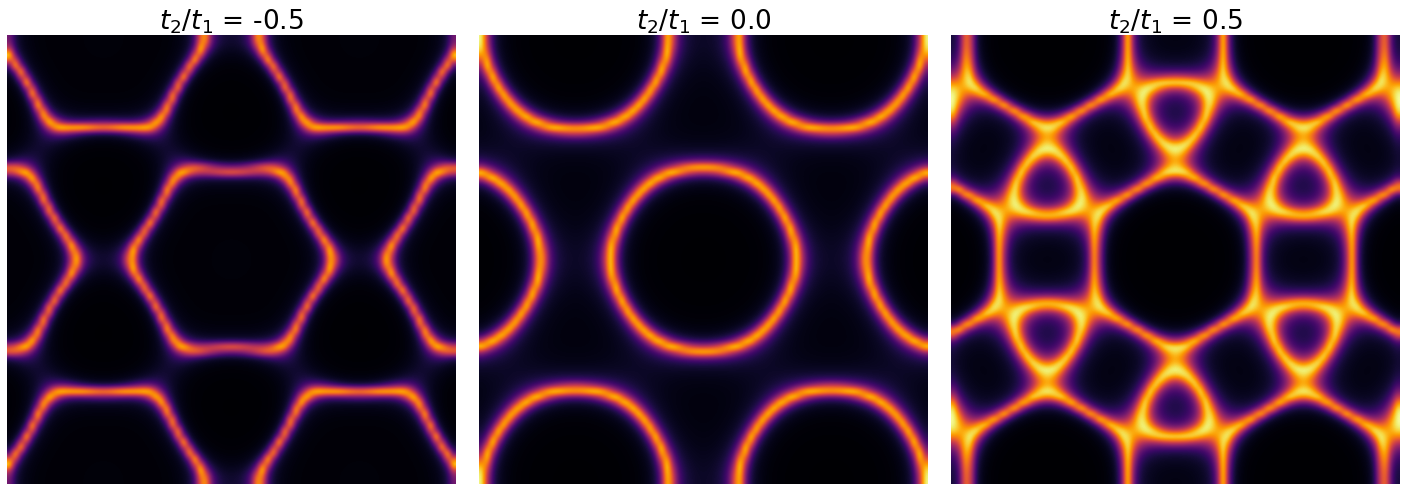

In [16]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a honeycomb lattice
nk = 80 ; delta = 30./nk # smearing and kmesh
t2s = np.linspace(-0.5,0.5,3) # loop over t2s
ip = 1 # counter for the plot
for t2 in t2s: # loop over t2s
    h = g.get_hamiltonian(tij=[1.,t2]) ; h.set_filling(0.5,nk=10) # generate the Hamiltonian at half filling
    (x,y,d) = h.get_fermi_surface(e=0.,delta=delta,nk=nk) # compute Fermi surface
    plt.subplot(1,len(t2s),ip) ; ip += 1 # set subplot
    d2d = d.reshape((nk,nk)) ; plt.imshow(d2d,vmin=0.,vmax=2./delta,cmap="inferno",interpolation="bicubic") 
    plt.title("$t_2/t_1$ = "+str(np.round(t2,2))) ; plt.axis("off")
plt.tight_layout()

### Exercise
- Replace the triangular lattice by a square lattice (square_lattice), recompute the spinon Fermi surfaces
- Replace the triangular lattice by a Kagome lattice (kagome_lattice), recompute the spinon Fermi surfaces
- Discuss why the effective tight binding model should be enforced to be at half filling
- Discuss how the hoppings of the quantum spin liquid depend on the exchange coupling of the parent Heisenberg model

#### In the lab
- Signatures of spinon Fermi surfaces in the triangular lattice have been observed with scanning tunnel microscopy
https://www.nature.com/articles/s41567-021-01321-0

## Topological magnons in 2D magnets
Ordered 2D magnets feature magnon excitations, that can be effectively described with a single particle Hamiltonian. Here we will see how such magnon excitations can develop a topological gap, leading to edge states

(-27.626210380723613, 27.626210380723577, -15.95, 15.95)

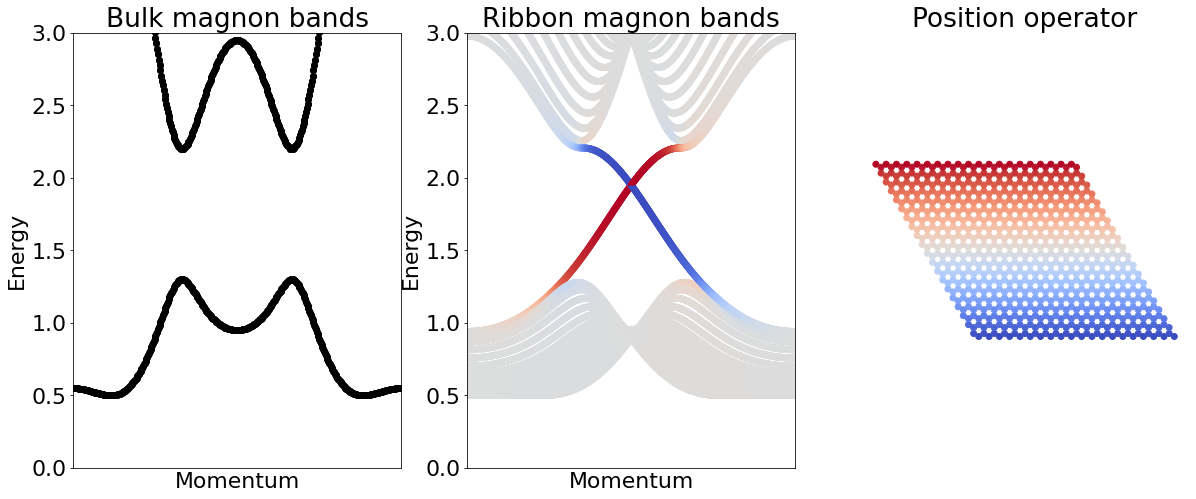

In [17]:
from pyqula import geometry, ribbon
g = geometry.honeycomb_lattice() # honeycomb lattice
h = g.get_hamiltonian(tij=[1.,0.2]) # generate the Hamiltonian
h.add_haldane(0.1) # add a coupling leadin to a topologicla gap
h.set_filling(0.0) ; h.add_onsite(0.5) # zero filling, and add a gap

# plot the bulk bands
plt.subplot(1,3,1) ; plt.title("Bulk magnon bands")
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([0.,3.])# plot

h = ribbon.bulk2ribbon(h,n=20)

# plot the bands
plt.subplot(1,3,2) ; plt.title("Ribbon magnon bands")
(k,e,c) = h.get_bands(operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([0.,3.])# plot

# draw a ribbon with the position operator
gs = h.geometry.get_supercell(20) 
plt.subplot(1,3,3) ; plt.title("Position operator")
plt.scatter(gs.r[:,0],gs.r[:,1],c=gs.r[:,1]) ; plt.axis("equal") ; plt.axis("off")

### Exercise
- Change the value of the coupling opening a topologicla magnon gap (add_haldane). Do you still observe magnon edge states?
- Change the value of the second neighbor hopping (tij=[1.,t2]). Do you still observe magnon edge states?
- Discuss why the magnon eigenspectra should be positive

#### In the lab
- Signatures of magnon gaps at the Dirac pont in CrI3 have been observed
https://journals.aps.org/prx/abstract/10.1103/PhysRevX.8.041028

## Heavy-fermions in van der Waals heterostructures
We now explore how the electronic structure of a van der Waals material is modified in the presence of a Kondo lattice. In the screened regime, a Kondo lattice will open up a heavy fermion gap in a metallic 2D material

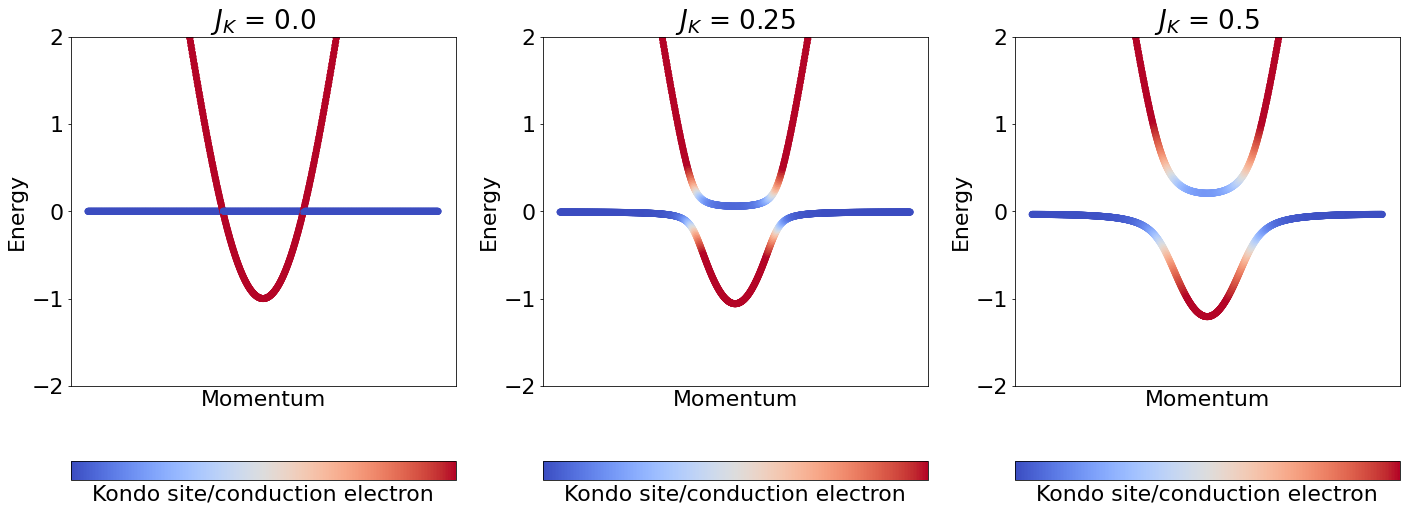

In [19]:
from pyqula import geometry
from pyqula.specialhamiltonian import H2HFH # promote a Hamiltonian to a heavy-fermion Hamiltonian
JKs = np.linspace(0.,.5,3) # chemical potentials
g = geometry.square_lattice() # take a honeycomb lattice
iw = 1 # counter
delta = 0.5 # value of the superconducting order
for JK in JKs: # loop over local potentials
    h = g.get_hamiltonian() ; h.add_onsite(3.0) # generate Hamiltonian
    h = H2HFH(h,JK=JK) # add a Kondo lattice in the fully screened regime 
    plt.subplot(1,len(JKs),iw) 
    iw +=1 ; plt.title("$J_K$ = "+str(np.round(JK,3)))
    (k,e,c) = h.get_bands(operator="dispersive_electrons",kpath=["G","X","G"]) # compute band structure
    plt.scatter(k,e,c=c,vmin=0.,vmax=0.8) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2.,2.])
    plt.colorbar(label="Kondo site/conduction electron",ticks=[],orientation="horizontal")
plt.tight_layout() # adjust

### Exercise
- Discuss what is teh origin of the flat blue band
- Discuss what is the physical origin of the anticrossing between the blue and red band
- Change the chemical potential. Do you still observe a gap opening in the electronic structure? Discuss why

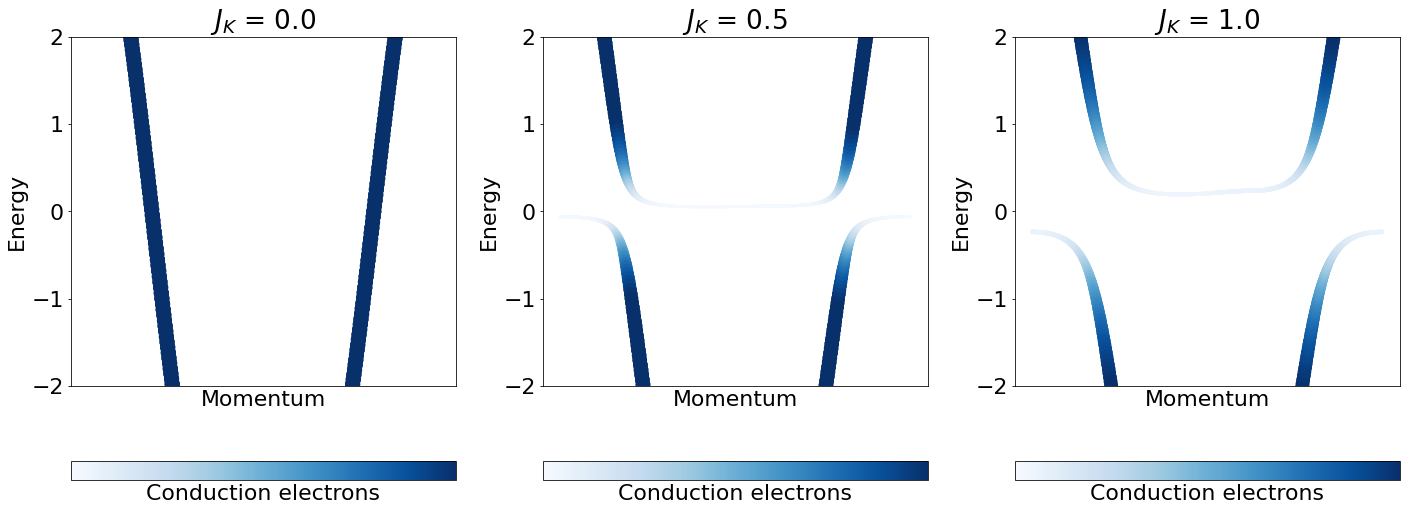

In [20]:
from pyqula import geometry
from pyqula.specialhamiltonian import H2HFH # promote a Hamiltonian to a heavy-fermion Hamiltonian
JKs = np.linspace(0.,1.,3) # chemical potentials
g = geometry.triangular_lattice() # take a triangular lattice
iw = 1 # counter
delta = 0.5 # value of the superconducting order
JK = 1. # Kondo coupling
for JK in JKs: # loop over local potentials
    h = g.get_hamiltonian() ; h.add_onsite(-2.0) # generate Hamiltonian
    h = H2HFH(h,JK=JK) # add a Kondo lattice in the fully screened regime 
    plt.subplot(1,len(JKs),iw) 
    iw +=1 ; plt.title("$J_K$ = "+str(np.round(JK,3)))
    (k,e,c) = h.get_bands(operator="dispersive_electrons",kpath=["G","K","M","G"]) # compute band structure
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues",vmin=0.,vmax=0.8) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2.,2.])
    plt.colorbar(label="Conduction electrons",ticks=[],orientation="horizontal")
plt.tight_layout() # adjust

### Exercise
- Change the chemical potential. Do you still observe a gap opening in the electronic structure? Discuss why
- Replace the triangular lattice by a honeycomb lattice. Do you observe a gap opening? Discuss why

#### In the lab
- Heavy fermions in a van der Waals heterostructure leading to a Kondo insulator have been observed in 1T-TaS2/1H-TaS2 heterostructures
https://www.nature.com/articles/s41586-021-04021-0